In [ ]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


# 1. 데이터 로드

In [ ]:
import tensorflow as tf
import numpy as np
import pickle
import matplotlib.pyplot as plt

# Load data
print('Load data...')
X = pickle.load(open('/content/drive/MyDrive/train_mfcc_features','rb'))
Y = pickle.load(open('/content/drive/MyDrive/train_labels','rb'))

Load data...


In [ ]:
# shift 데이터 로드 사용하지 않을경우 주석
X_shift = pickle.load(open('/content/drive/MyDrive/train_mfcc_features_shift','rb'))
Y_shift = pickle.load(open('/content/drive/MyDrive/train_labels_shift','rb'))

In [ ]:
# noise 데이터 로드 사용하지 않을경우 주석
X_noise = pickle.load(open('/content/drive/MyDrive/train_mfcc_features_noise','rb'))
Y_noise = pickle.load(open('/content/drive/MyDrive/train_labels_noise','rb'))

In [ ]:
X_part = pickle.load(open('/content/drive/MyDrive/train_mfcc_features_part','rb'))
Y_part = pickle.load(open('/content/drive/MyDrive/train_labels_part','rb'))

In [ ]:
X_extra = pickle.load(open('/content/drive/MyDrive/train_mfcc_features_extra','rb'))
Y_extra = pickle.load(open('/content/drive/MyDrive/train_labels_extra','rb'))

In [ ]:
# 데이터를 합해 줍니다
# 데이터 증식을 사용하지 않을경우 이부분을 주석처리 하면 됩니다
X = np.concatenate((X,X_shift,X_noise,X_part,X_extra),axis=0)
Y = np.concatenate((Y,Y_shift,Y_noise,Y_part,Y_extra),axis=0)

In [ ]:
#X_train = np.concatenate((X_train,X_train_part),axis=0)
#X_test = np.concatenate((X_test,X_test_shift,X_test_noise,X_test_part),axis=0)
#Y_train = np.concatenate((Y_train,Y_train_part),axis=0)
#Y_test = np.concatenate((Y_test,Y_test_shift,Y_test_noise,Y_test_part),axis=0)

In [ ]:
#X_train = np.concatenate((X_train,X_train_shift),axis=0)
#X_test = np.concatenate((X_test,X_test_shift,X_test_noise,X_test_part),axis=0)
#Y_train = np.concatenate((Y_train,Y_train_shift),axis=0)
#Y_test = np.concatenate((Y_test,Y_test_shift,Y_test_noise,Y_test_part),axis=0)

In [ ]:
#X_train = np.concatenate((X_train,X_train_noise),axis=0)
#X_test = np.concatenate((X_test,X_test_shift,X_test_noise,X_test_part),axis=0)
#Y_train = np.concatenate((Y_train,Y_train_noise),axis=0)
#Y_test = np.concatenate((Y_test,Y_test_shift,Y_test_noise,Y_test_part),axis=0)

In [ ]:
#X_train = np.concatenate((X_train,X_train_shift,X_train_noise),axis=0)
#X_test = np.concatenate((X_test,X_test_shift,X_test_noise,X_test_part),axis=0)
#Y_train = np.concatenate((Y_train,Y_train_shift,Y_train_noise),axis=0)
#Y_test = np.concatenate((Y_test,Y_test_shift,Y_test_noise,Y_test_part),axis=0)

In [ ]:
#X_train = np.concatenate((X_train,X_train_shift,X_train_part),axis=0)
#X_test = np.concatenate((X_test,X_test_shift,X_test_noise,X_test_part),axis=0)
#Y_train = np.concatenate((Y_train,Y_train_shift,Y_train_part),axis=0)
#Y_test = np.concatenate((Y_test,Y_test_shift,Y_test_noise,Y_test_part),axis=0)

In [ ]:
#X_train = np.concatenate((X_train,X_train_noise,X_train_part),axis=0)
#X_test = np.concatenate((X_test,X_test_shift,X_test_noise,X_test_part),axis=0)
#Y_train = np.concatenate((Y_train,Y_train_noise,Y_train_part),axis=0)
#Y_test = np.concatenate((Y_test,Y_test_shift,Y_test_noise,Y_test_part),axis=0)

In [ ]:
# Reshape the 
from sklearn.model_selection import train_test_split

X_train, X_vali, Y_train, Y_vali = train_test_split(X, Y, test_size = 0.2, random_state = 1)
max_length = pickle.load(open('/content/drive/MyDrive/max_length','rb'))
X_train = np.expand_dims(X_train, axis=3)
X_train = np.transpose(X_train, (0, 2, 1, 3))

X_vali = np.expand_dims(X_vali, axis=3)
X_vali = np.transpose(X_vali, (0, 2, 1, 3))

Y_train = Y_train[:, 0, :]
Y_vali = Y_vali[:, 0, :]

print('X_train:' , X_train.shape)
print('Y_train:' , Y_train.shape)
print('X_vali:' , X_vali.shape)
print('Y_vali:' , Y_vali.shape)

X_train: (1337, 13, 1229, 1)
Y_train: (1337, 22)
X_vali: (335, 13, 1229, 1)
Y_vali: (335, 22)


#모델 설계

학습 데이터는 모두 준비되었고, 이제 학습을 위한 모델을 설계해보겠습니다.

In [ ]:
from tensorflow import keras
from keras.models import Sequential, Model
from keras.layers import Dense, Dropout, Activation, Flatten, Conv2D, pooling, concatenate, Add, Input, AlphaDropout
from keras.optimizers import Nadam
from keras.optimizers import Adam
from keras.optimizers import Adamax #이런식으로 옵티마이저 추가 하면 됩니다
from keras.optimizers import Adadelta
from keras.optimizers import RMSprop
from keras.optimizers import SGD
from keras.regularizers import l2

In [ ]:
# 2번 모듈 사용하지 않을경우 주석 
#파라미터 변화를 그릴 때 모델을 여러개 설계후 한번에 계산하면 편해서 추가시킨 부분 
model = Sequential()
model.add(Conv2D(32,2,2,activation='selu', input_shape=(13, 1229, 1)))
model.add(Conv2D(32,2,2,activation='selu'))

model.add(pooling.MaxPooling2D(pool_size=(2,3)))
model.add(AlphaDropout(0.7))

model.add(Flatten())
model.add(Dense(256,kernel_regularizer=l2(0.001), activation='selu'))
model.add(AlphaDropout(0.4))
model.add(Dense(128,kernel_regularizer=l2(0.001), activation='selu'))
model.add(AlphaDropout(0.4))
model.add(Dense(64,kernel_regularizer=l2(0.001), activation='selu'))
model.add(AlphaDropout(0.4))

model.add(Dense(22, activation='softmax'))

이제 모델의 구조 설계는 끝났습니다.

2개의 Convolutional layer와 max pooling, dropout과 Fully-connected layer로 구성된 아주 간단한 모델을 구성해 보았습니다.

이제 이 모델에 어떠한 loss를 줄 것이고, 어떤 optimizer를 이용해 학습 시킬지 정해보겠습니다


In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 6, 614, 32)        160       
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 3, 307, 32)        4128      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 1, 102, 32)        0         
_________________________________________________________________
alpha_dropout_4 (AlphaDropou (None, 1, 102, 32)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 3264)              0         
_________________________________________________________________
dense_4 (Dense)              (None, 256)               835840    
_________________________________________________________________
alpha_dropout_5 (AlphaDropou (None, 256)              

In [ ]:
# 전체 모델은 sequential 하게 conv layer 및 pooling layer, 그리고 dense로 구성되어있다. 
# 이제 해당 모델에 어떤 loss를 줄거고, 어떤 optimizer를 쓸지 정해주자. 
opt = Nadam(learning_rate=0.0005)
# 체크 포인트 콜백
#모델 2번 사용하지 않을경우 주석
model.compile(loss = 'categorical_crossentropy', optimizer = opt, metrics = ['accuracy'])


학습을 시작하기 전에 설계한 모델의 정보를 출력해봅니다.

각 층마다 출력 모양, 파라미터 수를 확인할 수 있습니다.

#모델 훈련

이제, 학습을 시작합니다.

Epoch은 전체 데이터에 대한 반복 학습 횟수입니다.

학습 도중 각 단계마다 오차(loss)와 정확도(acc)가 출력됩니다.

학습이 진행되는 동안 이 둘이 어떻게 변하는지 확인합니다.

In [ ]:
# 실제 Training하는 부분!! (epoch 및 batch size는 필요에 맞게 조정 가능)
checkpoint_filepath = '/tmp/checkpoint'
model_checkpoint_callback = keras.callbacks.ModelCheckpoint(
    filepath=checkpoint_filepath,
    save_weights_only=True,
    monitor='val_loss',
    mode='auto',
    save_best_only=True)
hist = model.fit(X_train, Y_train, epochs=200, batch_size=30, verbose=1, validation_data=(X_vali, Y_vali), callbacks=[model_checkpoint_callback])


Epoch 1/200
45/45 [==============================] - 3s 19ms/step - loss: 5.4774 - accuracy: 0.0624 - val_loss: 6.4726 - val_accuracy: 0.0299
Epoch 2/200
45/45 [==============================] - 0s 8ms/step - loss: 4.4074 - accuracy: 0.0486 - val_loss: 5.6454 - val_accuracy: 0.0597
Epoch 3/200
45/45 [==============================] - 0s 9ms/step - loss: 4.1513 - accuracy: 0.0700 - val_loss: 4.4428 - val_accuracy: 0.0567
Epoch 4/200
45/45 [==============================] - 0s 8ms/step - loss: 3.9596 - accuracy: 0.0745 - val_loss: 4.0858 - val_accuracy: 0.0657
Epoch 5/200
45/45 [==============================] - 0s 8ms/step - loss: 3.8060 - accuracy: 0.0899 - val_loss: 3.6629 - val_accuracy: 0.1015
Epoch 6/200
45/45 [==============================] - 0s 8ms/step - loss: 3.7279 - accuracy: 0.0977 - val_loss: 3.7260 - val_accuracy: 0.1881
Epoch 7/200
45/45 [==============================] - 0s 8ms/step - loss: 3.5784 - accuracy: 0.1235 - val_loss: 3.0901 - val_accuracy: 0.3104
Epoch 8/200


In [ ]:
vali_accuracy  = model.evaluate(X_vali, Y_vali, verbose=0)
print('%s: %.2f%%' % ('Validation Accuracy',vali_accuracy[1]*100))

Validation Accuracy: 99.70%


# 모델 평가 및 결과 분석

다음은 훈련 중 loss와 accuracy가 어떻게 변했는지를 그래프로 나타내보겠습니다.

학습 과정이 길다면 한 눈에 살펴볼 수 있는 좋은 방법입니다.

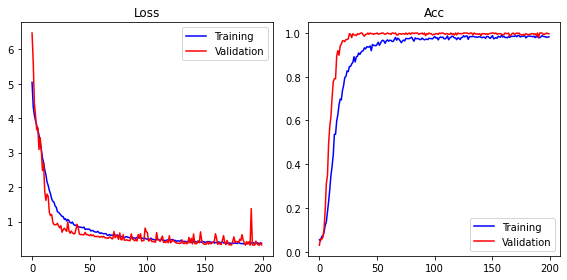

In [ ]:
plt.figure(figsize=(8, 4))
plt.subplot(1, 2, 1)
plt.title("Loss")
plt.plot(hist.history['loss'], 'b-', label="t")
plt.plot(hist.history['val_loss'], 'r-', label="t")
plt.legend(['Training','Validation'])

plt.subplot(1, 2, 2)
plt.title("Acc")
plt.plot(hist.history['accuracy'], 'b-', label="t")
plt.plot(hist.history['val_accuracy'], 'r-', label="t")
plt.legend(['Training','Validation'])
plt.tight_layout()
plt.show()

이제 학습이 완료되었습니다.

미리 나눠둔 test set을 이용해 실제 성능을 확인해봅니다.

테스트 결과를 바탕으로 confusion matrix를 그려봅니다.

Confusion matrix는 실제 정답과 예측한 정답 사이의 관계를 나타낸 표입니다.

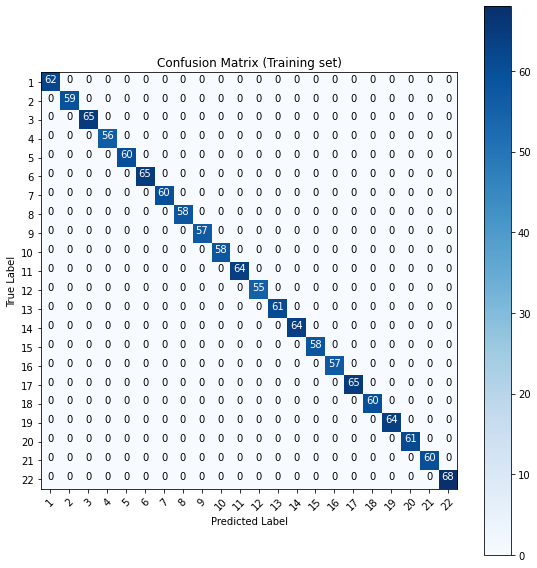

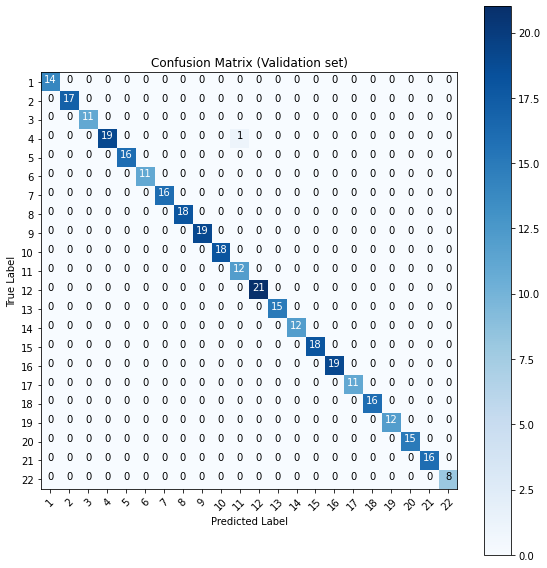

In [ ]:
# '1'     , '2'     , '3'     , '4'     , '5'     , '6'     , '7'     , '8'     , '9'     , '10'    , '11'    , '12'    , '13'    , '14'    , '15'    , '16'    , '17'    , '18'    , '19'    , '20'    , '21'    , '22'     
# '박경원', '김동현', '이수연', '정재원', '박성환', '심형준', '유지현', '장종빈', '임현우', '안제호', '박세진', '이민구', '김장현', '류승현', '고무현', '심대한', '김영민', '정성현', '임태윤', '진형민', '김동원', '변준(조교)'

from sklearn.metrics import classification_report, confusion_matrix
import itertools
Y_pred = model.predict(X_train)
y_pred = np.argmax(Y_pred, axis=1)
y_gt = np.argmax(Y_train, axis=1)

plt.figure(figsize=(8,8))
cm = confusion_matrix(y_gt, y_pred, labels=[0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21])
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.title("Confusion Matrix (Training set)")
plt.colorbar()
tick_marks = np.arange(22)
plt.xticks(tick_marks, ['1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', '13', '14', '15', '16', '17', '18', '19', '20', '21', '22'], rotation=45)
plt.yticks(tick_marks, ['1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', '13', '14', '15', '16', '17', '18', '19', '20', '21', '22'])
thresh = cm.max()/2.
normalize = False
fmt = '.2f' if normalize else 'd'
for i,j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
  plt.text(j,i, format(cm[i,j], fmt), horizontalalignment="center", color="white" if cm[i,j] > thresh else "black")
plt.ylabel("True Label")
plt.xlabel("Predicted Label")
plt.tight_layout()

# '1'     , '2'     , '3'     , '4'     , '5'     , '6'     , '7'     , '8'     , '9'     , '10'    , '11'    , '12'    , '13'    , '14'    , '15'    , '16'    , '17'    , '18'    , '19'    , '20'    , '21'    , '22'     
# '박경원', '김동현', '이수연', '정재원', '박성환', '심형준', '유지현', '장종빈', '임현우', '안제호', '박세진', '이민구', '김장현', '류승현', '고무현', '심대한', '김영민', '정성현', '임태윤', '진형민', '김동원', '변준(조교)'
Y_pred2 = model.predict(X_vali)
y_pred2 = np.argmax(Y_pred2, axis=1)
y_gt2 = np.argmax(Y_vali, axis=1)

plt.figure(figsize=(8,8))
cm2 = confusion_matrix(y_gt2, y_pred2, labels=[0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21])
plt.imshow(cm2, interpolation='nearest', cmap=plt.cm.Blues)
plt.title("Confusion Matrix (Validation set)")
plt.colorbar()
tick_marks = np.arange(22)
plt.xticks(tick_marks, ['1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', '13', '14', '15', '16', '17', '18', '19', '20', '21', '22'], rotation=45)
plt.yticks(tick_marks, ['1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', '13', '14', '15', '16', '17', '18', '19', '20', '21', '22'])
thresh2 = cm2.max()/2.
normalize = False
fmt = '.2f' if normalize else 'd'
for i,j in itertools.product(range(cm2.shape[0]), range(cm2.shape[1])):
  plt.text(j,i, format(cm2[i,j], fmt), horizontalalignment="center", color="white" if cm2[i,j] > thresh2 else "black")
plt.ylabel("True Label")
plt.xlabel("Predicted Label")
plt.tight_layout()
plt.show()

In [ ]:
# dictionary
dic = {'1':'박경원', '2':'김동현', '3':'이수연', '4':'정재원', '5':'박성환', '6':'심형준', '7':'유지현', '8':'장종빈', '9':'임현우', '10':'안제호', '11':'박세진', '12':'이민구', '13':'김장현', '14':'류승현', '15':'고무현', '16':'심대한', '17':'김영민', '18':'정성현', '19':'임태윤', '20':'진형민','21':'김동원', '22':'변준(조교)'}

# test
print(dic['1'])

박경원


In [ ]:
# 임의의 오디오를 특정 길이가 되도록 padding 하는 함수
def pad_audio(audio, max_length):
	length = len(audio)
	return np.concatenate((audio, np.zeros((max_length-length))))

In [ ]:
import librosa

# validation accuracy가 가장 높았을 때의 weights을 불어옴
model.load_weights(checkpoint_filepath)

test_acc = 0

for s in range(1,23):
      # 테스트 음원 읽기
      (x,fs) = librosa.load('/content/drive/MyDrive/training_data_wav_16k_final/'+str(s)+'_5.wav')

      # 음원 길이 맞추기
      x = pad_audio(x, max_length)

      # mfcc 특징 추출
      mfcc = librosa.feature.mfcc(y=x, sr=fs,n_mfcc=13)
      mfccs = mfcc - np.reshape(np.mean(mfcc,1),(13,1)) # 13 x frame_size
      mfccs = np.transpose(mfccs)

      # 특징 입력 reshaping
      X_input = np.expand_dims(mfccs, axis=0)
      X_input = np.expand_dims(X_input, axis=3)
      X_input = np.transpose(X_input, (0, 2, 1, 3))
      
      # DNN 예측
      Y_pred = model.predict(X_input)
      y_pred = np.argmax(Y_pred, axis=1)

      #print(s)
      #print(y_pred)
      print('정답: '+dic[str(s)] + '/ 예측: ' + dic[str(y_pred[0]+1)])
      if (s-1) == y_pred:
        test_acc += 1

# 22명에 대하여 평균
test_acc /= 22
test_acc *= 100 # 백분율로 변환

print('테스트 예측 정확도 = ' + str(test_acc)+'%')

정답: 박경원/ 예측: 박경원
정답: 김동현/ 예측: 김동현
정답: 이수연/ 예측: 이수연
정답: 정재원/ 예측: 정재원
정답: 박성환/ 예측: 박성환
정답: 심형준/ 예측: 심형준
정답: 유지현/ 예측: 유지현
정답: 장종빈/ 예측: 장종빈
정답: 임현우/ 예측: 임현우
정답: 안제호/ 예측: 안제호
정답: 박세진/ 예측: 박세진
정답: 이민구/ 예측: 이민구
정답: 김장현/ 예측: 김장현
정답: 류승현/ 예측: 류승현
정답: 고무현/ 예측: 고무현
정답: 심대한/ 예측: 심대한
정답: 김영민/ 예측: 김영민
정답: 정성현/ 예측: 정성현
정답: 임태윤/ 예측: 임태윤
정답: 진형민/ 예측: 진형민
정답: 김동원/ 예측: 김동원
정답: 변준(조교)/ 예측: 변준(조교)
테스트 예측 정확도 = 100.0%


# training된 모델을 HDF5 파일로 저장합니다

In [ ]:
#model.save('/content/drive/MyDrive/final.h5')

#따로 모델명 바꾸면 따로 저장 가능